#Problem 2

##Task (a)

Loaded 926 images.
Detected 26 outliers.


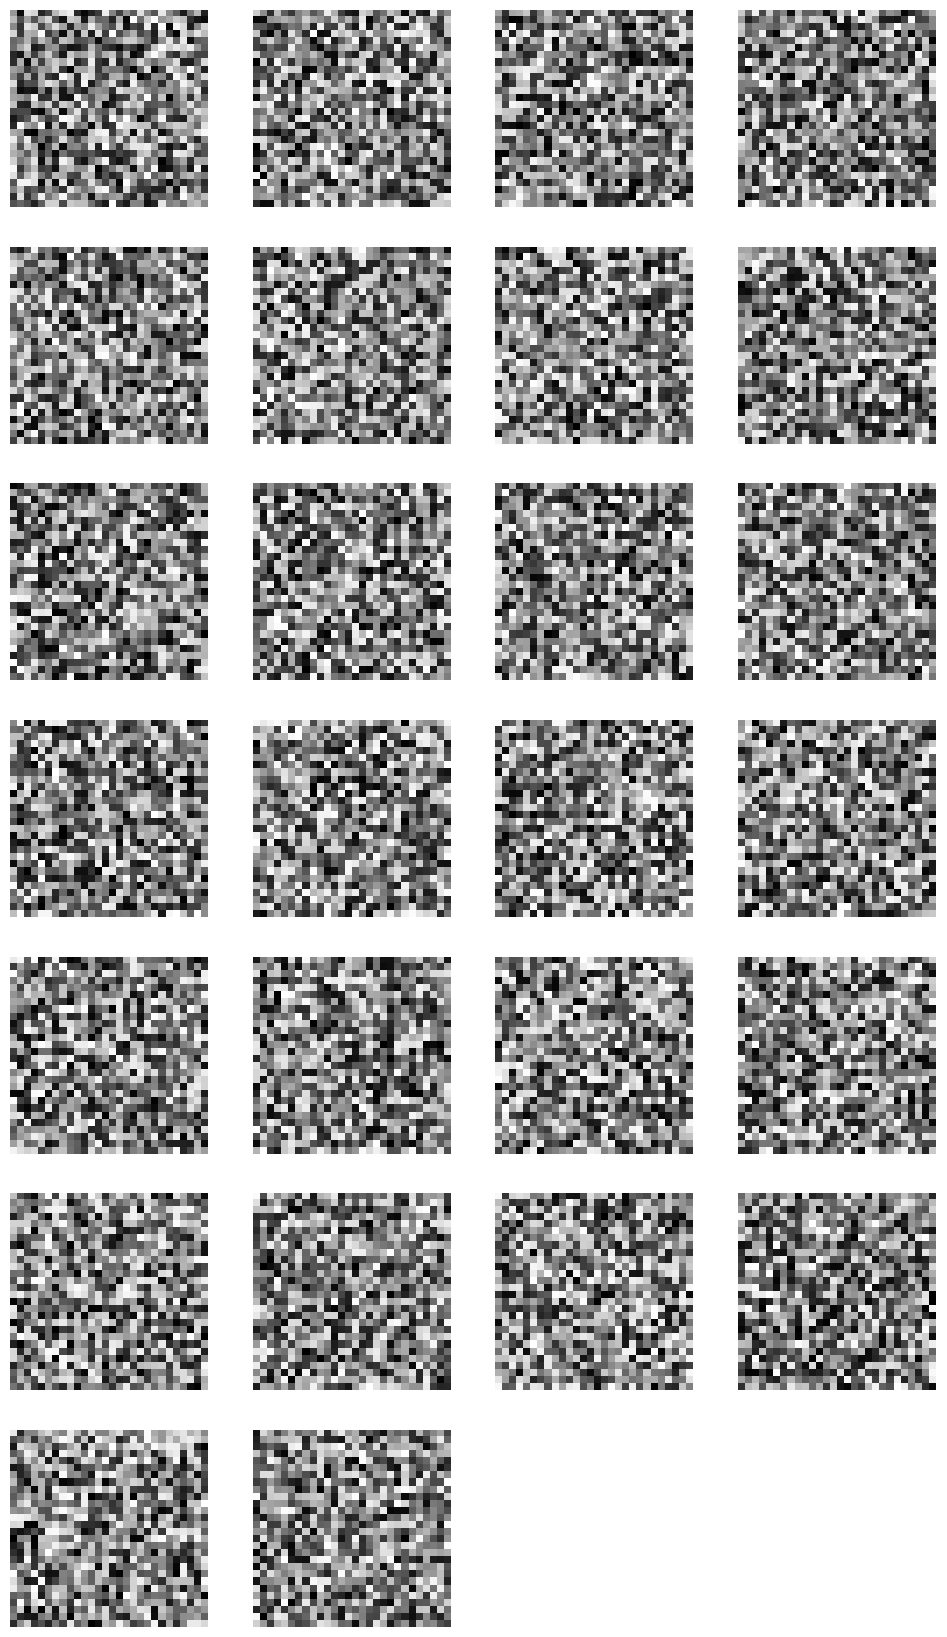

In [1]:
import os
import cv2
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# I have uploaded my data in google drive and then used it
data_path = "/content/drive/MyDrive/outlier_dataset"

# Function to load the images
def load_images(folder):
    # images data stored in the given format (name(string), array(shape(784,)))
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        if img is not None:
            images.append([filename, img.flatten()])  # Flatten image
    return images

# Load images
images = load_images(data_path)
print(f"Loaded {len(images)} images.")   # To check the number of images loaded

def euclidean_distance(vec1, vec2):      # Function to calculate distance between two vectors
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def find_neighbors(images, eps):
    num_images = len(images)
    neighbors_list = [[] for _ in range(num_images)]
    for i in range(num_images):
        for j in range(num_images):
            if i != j and euclidean_distance(images[i][1], images[j][1]) <= eps:
                neighbors_list[i].append(j)
    return neighbors_list


def find_clusters(images, eps=150, min_samples=4):
    num_images = len(images)
    visited = [False] * num_images
    labels = [-1] * num_images  # -1 means noise (outlier)
    cluster_id = 0
    neighbors_list = find_neighbors(images, eps)

    for i in range(num_images):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = neighbors_list[i]

        if len(neighbors) < min_samples:
            labels[i] = 0  # Mark as noise (outlier)
        else:
            cluster_id += 1
            queue = deque([i])
            labels[i] = cluster_id  # Assign cluster

            while queue:
                curr = queue.popleft()
                for neighbor in neighbors_list[curr]:
                    if not visited[neighbor]:
                        visited[neighbor] = True
                        queue.append(neighbor)
                    if labels[neighbor] == -1:
                        labels[neighbor] = cluster_id  # Assign to cluster

    return labels

# Function to display outliers
def display_outliers(images_list, labels, data_path):
    # Extract outliers
    outlier_images = [cv2.imread(os.path.join(data_path, images_list[i][0]), cv2.IMREAD_GRAYSCALE)
                      for i in range(len(images_list)) if labels[i] == 0]

    num_outliers = len(outlier_images)
    if num_outliers == 0:
        print("No outliers detected.")
        return

    cols = 4
    rows = (num_outliers // cols) + (num_outliers % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for ax in axes[num_outliers:]:
        ax.axis('off')

    # Display images
    for ax, img in zip(axes, outlier_images):
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.axis('off')

    plt.show()

labels = find_clusters(images)
outliers = sum(1 for label in labels if label == 0)
print(f"Detected {outliers} outliers.")  # The number of outliers detected
# Display the detected outliers visually
display_outliers(images, labels, data_path)

##Task (b)

Loaded 926 images.


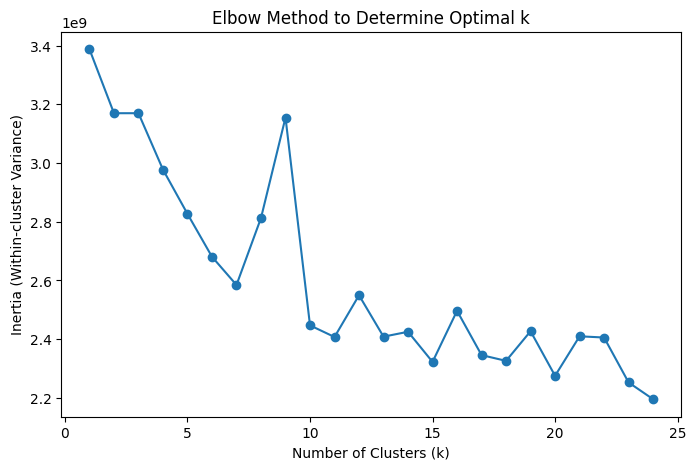

Optimal k (from elbow method): 10

Cluster 1:
mnist_254.png
mnist_490.png
mnist_531.png
mnist_453.png
mnist_334.png
mnist_692.png
mnist_297.png
mnist_296.png
mnist_243.png
mnist_479.png
mnist_322.png
mnist_323.png
mnist_451.png
mnist_336.png
mnist_245.png
mnist_695.png
mnist_441.png
mnist_16.png
mnist_454.png
mnist_509.png
mnist_124.png
mnist_246.png
mnist_871.png
mnist_866.png
mnist_495.png
mnist_654.png
mnist_668.png
mnist_640.png
mnist_356.png
mnist_5.png
mnist_244.png
mnist_418.png
mnist_182.png
mnist_522.png
mnist_815.png
mnist_626.png
mnist_396.png
mnist_354.png
mnist_222.png
mnist_785.png
mnist_433.png
mnist_744.png
mnist_544.png
mnist_341.png
mnist_553.png
mnist_590.png
mnist_619.png
mnist_157.png
mnist_61.png
mnist_816.png
mnist_225.png
mnist_74.png
mnist_76.png
mnist_620.png
mnist_742.png
mnist_224.png
mnist_226.png
mnist_797.png
mnist_232.png
mnist_63.png
mnist_186.png
mnist_804.png
mnist_202.png
mnist_435.png
mnist_352.png
mnist_805.png
mnist_421.png
mnist_420.png
mnist_558

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_path = "/content/drive/MyDrive/outlier_dataset"

# Function to load images
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        if img is not None:
            images.append([filename, img.flatten()])  # Flatten image
    return images

# Load images
images = load_images(data_path)
print(f"Loaded {len(images)} images.")

def euclidean_distance(point1, point2):            # Function to calculate distance between two vectors
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering(data, k, max_iterations=100):
    centroids = np.array([data[np.random.choice(len(data))][1] for _ in range(k)]) # Select centroids

    for _ in range(max_iterations):
        distances = np.array([[euclidean_distance(img[1], centroid) for centroid in centroids] for img in data])  # Calculate distance of images from centroid
        cluster_assignments = np.argmin(distances, axis=1)

        new_centroids = np.array([
            np.mean([data[i][1] for i in range(len(data)) if cluster_assignments[i] == j], axis=0)
            if np.any(cluster_assignments == j) else centroids[j]  # Avoid empty clusters
            for j in range(k)
        ])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Compute within-cluster variance (inertia)
    inertia = sum(np.sum((data[i][1] - centroids[cluster_assignments[i]])**2) for i in range(len(data)))

    return cluster_assignments, centroids, inertia

# Convert images list to numpy array
data = np.array(images, dtype=object)

# Find optimal k
k_values = list(range(1, 25))  # Trying k from 1 to 25
inertia_values = []

for k in k_values:
    _, _, inertia = k_means_clustering(data, k)
    inertia_values.append(inertia)

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Variance)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Choose the best k (from the Elbow Method, or manually set)
optimal_k = k_values[np.argmin(np.gradient(inertia_values))]  # Detect the "elbow" point
print(f"Optimal k (from elbow method): {optimal_k}")

# Perform final clustering with the optimal k
final_k = optimal_k
cluster_assignments, centroids, _ = k_means_clustering(data, final_k)

# Display image names in each cluster so that outliers can be detected
clusters = {i: [] for i in range(final_k)}
for i, (name, _) in enumerate(data):
    clusters[cluster_assignments[i]].append(name)

for cluster_id, image_names in clusters.items():
    print(f"\nCluster {cluster_id + 1}:")
    print("\n".join(image_names))
